In [1]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer

import gropt_dev as gropt

Final Good: True
Solve time: 32.2 ms


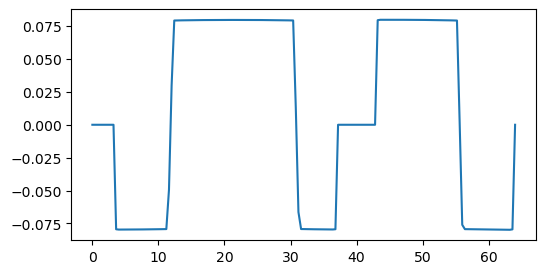

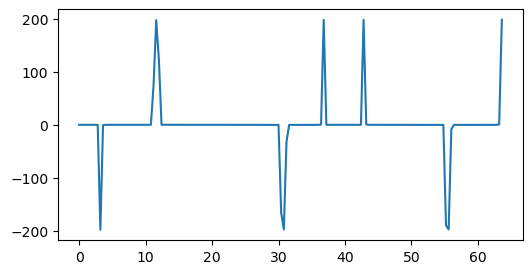

Max SAFE 1.469


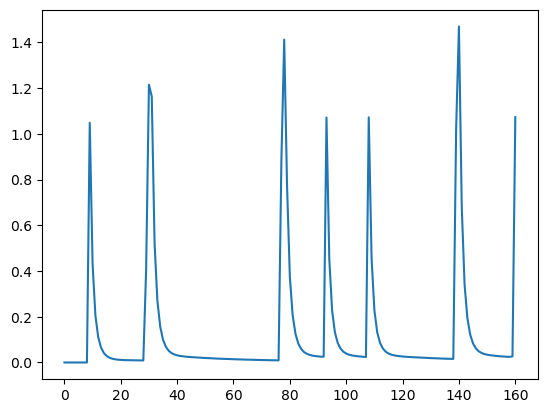

In [29]:
gropt.gropt_wrapper.set_verbose(4)
gparams = gropt.GroptParams()
gparams.diff_init()

gparams.add_gmax(.08)
gparams.add_smax(200)
gparams.add_moment(0,0.0)
gparams.add_moment(1,0.0)
gparams.add_moment(2,0.0)
gparams.add_bvalue(759,1)

start_t = timer()
gparams.init()
gparams.solve()
out = gparams.get_out()
stop_t = timer()

print(f'Final Good: {gparams.final_good>0}   Solve time: {1000*(stop_t-start_t):.1f} ms')

plt.figure(figsize=(6,3))
tt_ms = np.arange(out.size)*gparams.dt*1e3
plt.plot(tt_ms, out)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(tt_ms[:-1], np.diff(out)/gparams.dt)
plt.show()

safe = gropt.gropt_wrapper.get_SAFE(out, gparams.dt)
print(f'Max SAFE {np.max(safe):.3f}')
plt.figure()
plt.plot(safe)

Final Good: True
Solve time: 86.4 ms


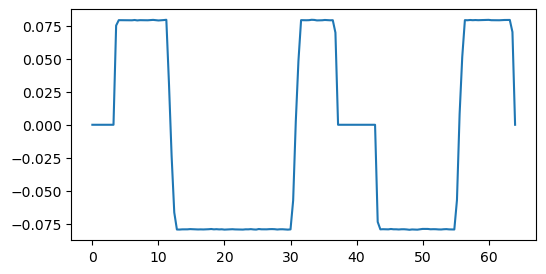

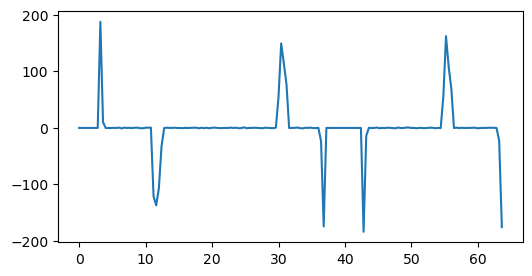

Max SAFE 0.999


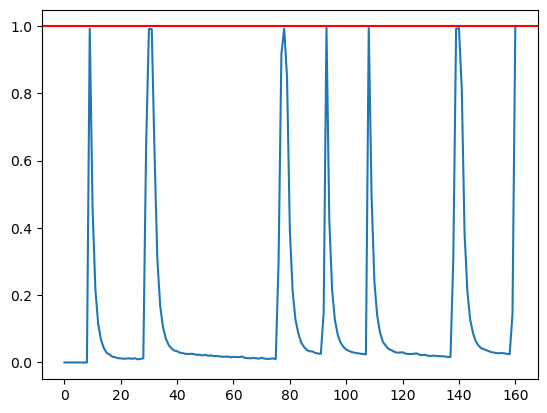

In [40]:
gropt.gropt_wrapper.set_verbose(4)
gparams = gropt.GroptParams()
gparams.diff_init()

gparams.add_gmax(.08)
gparams.add_smax(200)
gparams.add_moment(0,0.0)
gparams.add_moment(1,0.0)
gparams.add_moment(2,0.0)
gparams.add_bvalue(743,1)
safe_lim = 1.0
gparams.add_SAFE(safe_lim)


start_t = timer()
gparams.init()
gparams.solve(n_iter=5000)
out = gparams.get_out()
stop_t = timer()

print(f'Final Good: {gparams.final_good>0}   Solve time: {1000*(stop_t-start_t):.1f} ms')

plt.figure(figsize=(6,3))
tt_ms = np.arange(out.size)*gparams.dt*1e3
plt.plot(tt_ms, out)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(tt_ms[:-1], np.diff(out)/gparams.dt)
plt.show()


safe = gropt.gropt_wrapper.get_SAFE(out, gparams.dt, true_safe=True)
print(f'Max SAFE {np.max(safe):.3f}')
plt.figure()
plt.plot(safe)
plt.axhline(safe_lim, color='r')